### Desafío - Regularización

**nombre alumno: Moises Quiroz Diaz**

Profesor: Gabriel Tamayo L.

Generación: G3

Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección
correspondiente.


#### Descripción
En esta ocasión utilizaremos datos de la composición química de muestras de vino.

Nuestro propósito será tratar de predecir su calidad a partir de su composición química.

Comience su estudio realizando un breve análisis exploratorio y descriptivo:
* Identifique el tipo de datos de cada columna.
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
* Encuentre la cantidad de valores faltantes en cada columna.
* Grafique la distribución empírica de cada atributo.

### Ejercicio 1: Preparación del Ambiente de Trabajo
* Importe las librerías básicas
* Importe los métodos asociados a regularización
* Importe la base de datos

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from cv_error import *
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-darkgrid')

In [76]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio
* Identifique el tipo de datos de cada columna.
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


***Se observa que se tratan solo de datos numeriscos, la mayoria floats, y que la nada no posee datos null***

Histograma de: fixed acidity


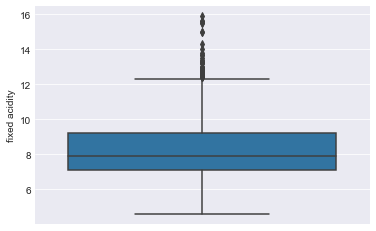

-------------------------
Histograma de: volatile acidity


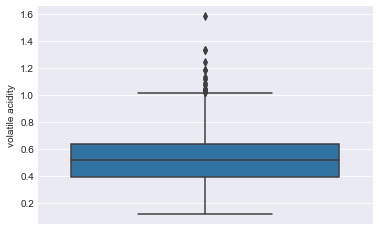

-------------------------
Histograma de: citric acid


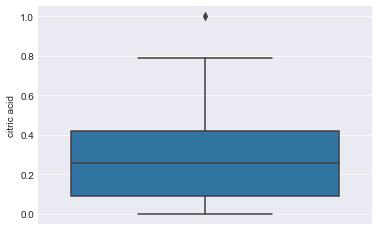

-------------------------
Histograma de: residual sugar


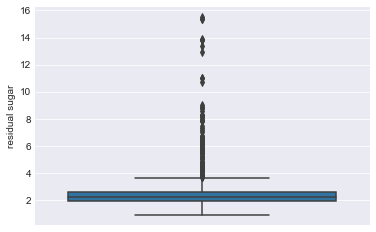

-------------------------
Histograma de: chlorides


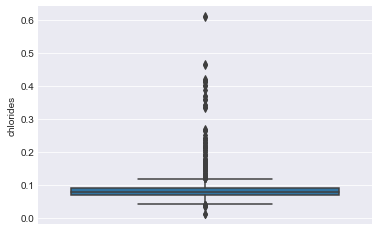

-------------------------
Histograma de: free sulfur dioxide


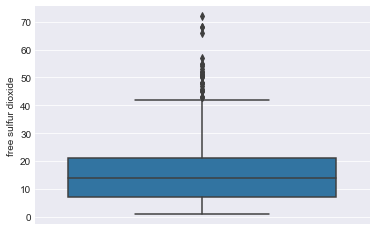

-------------------------
Histograma de: total sulfur dioxide


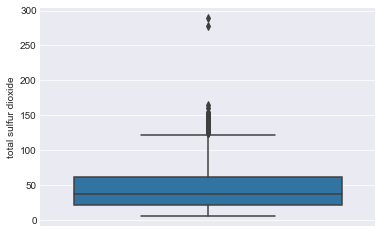

-------------------------
Histograma de: density


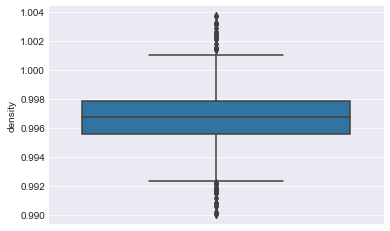

-------------------------
Histograma de: pH


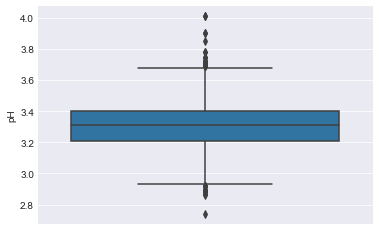

-------------------------
Histograma de: sulphates


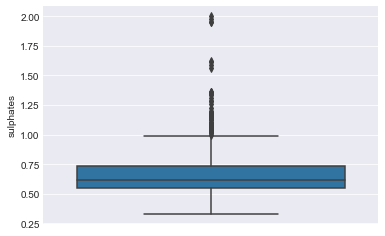

-------------------------
Histograma de: alcohol


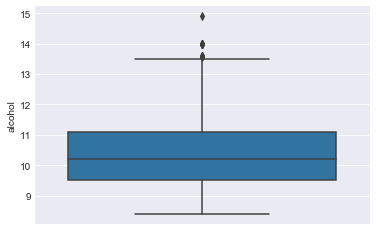

-------------------------
Histograma de: quality


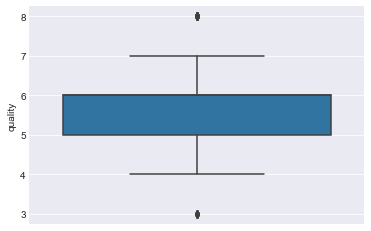

-------------------------


In [15]:
for i in df.columns:
    print('Histograma de:',i)
    sns.boxplot(i,data=df,orient='v')
    plt.show()
    print('-------------------------')

Se observa que en todas las columnas se encuentran datos outliers, donde las que presentan mas son 'residual sugar' y 'chlorides'

###### Para analizar outliers multivariados, se comparara con scatterplots, donde 'x' correspondera a nuestra variable objetivo e 'y' sera el resto

quality vs fixed acidity


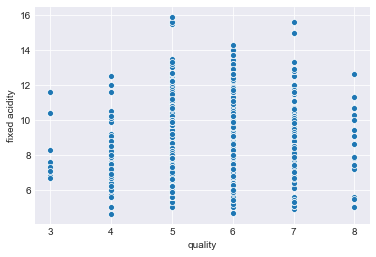

---------------------
quality vs volatile acidity


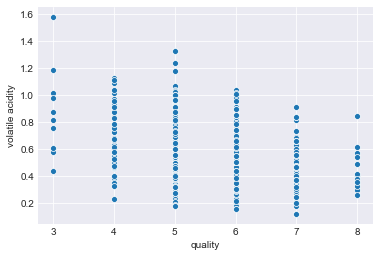

---------------------
quality vs citric acid


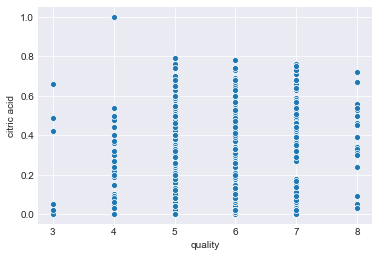

---------------------
quality vs residual sugar


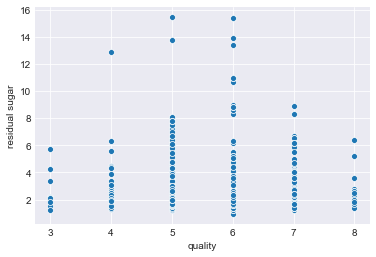

---------------------
quality vs chlorides


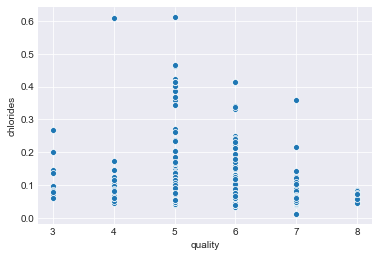

---------------------
quality vs free sulfur dioxide


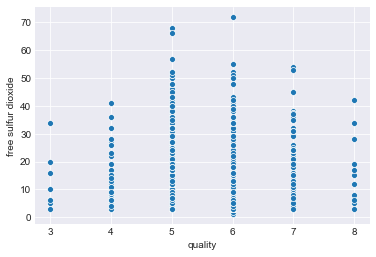

---------------------
quality vs total sulfur dioxide


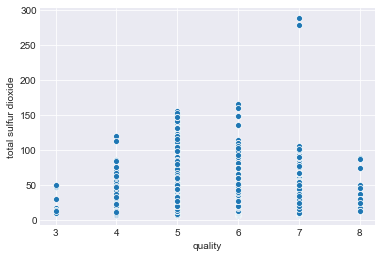

---------------------
quality vs density


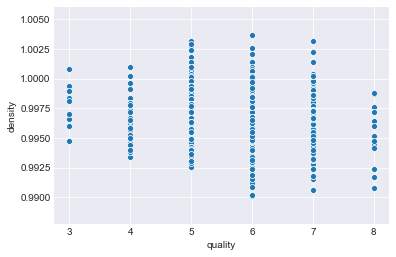

---------------------
quality vs pH


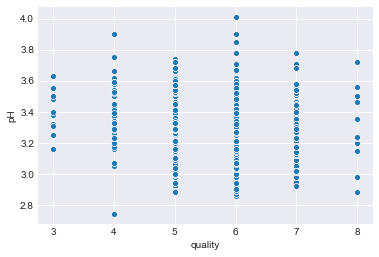

---------------------
quality vs sulphates


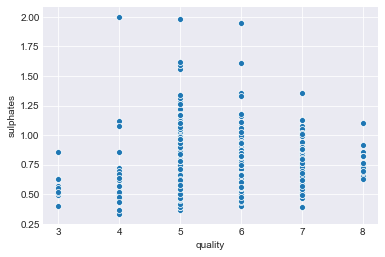

---------------------
quality vs alcohol


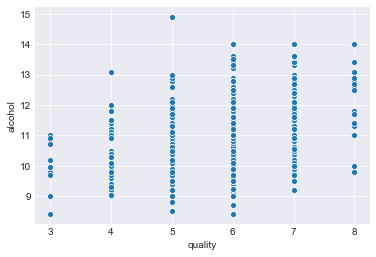

---------------------


In [22]:
for i in df.columns[:-1]:
    print('quality vs',i)
    sns.scatterplot(x='quality',y=i,data=df)
    plt.show()
    print('---------------------')
    

existe un comportamiento similar al ejemplo univariado, aunque si bien existen outliers a la vez se encuentran datos que comparten una tendencia clara.

### Ejercicio 3: Regularización de modelos
Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV . Para cada uno de ellos implemente los siguientes pasos:
* Entrene los modelos con 10 validaciones cruzadas.
* Extraiga los coeficientes estimados, el mejor valor alpha, MAE (median_absolute_error) y RMSE (mean_squared_error) asociado a cada modelo.

En base a la información solicitada, responda lo siguiente:
* ¿Qué modelo presenta un mejor desempeño en base a las métricas?
* ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

Sobre los métodos RidgeCV , LassoCV y ElasticNetCV
* Para implementar la búsqueda de hiperparámetros con validación cruzada, utilizaremos la clase sklearn.linear_model.{RidgeCV, LassoCV, ElasticNetCV} .
* Por defecto, la clase necesita de una lista de valores alphas que representa el hiperparámetro de validación. Si no se define la lista, el método incorporará un array con valores por defecto.
* Por defecto la clase tendrá una opción scoring que permitirá definir la métrica con la cual se evaluará el mejor hiperparámetro. Para el caso de un problema de regresión, si no se define, la métrica será el error cuadrático promedio negativo (más alto es mejor).
* Una vez entrenado el modelo, se puede reportar el mejor alpha con modelo_entrenado.alpha_ , el valor de los coeficientes con modelo_entrenado.coef_ y los valores de la métrica de desempeño con modelo_entrenado.cv_values_

El primer paso sera estandarizar la data, para que el resultado dependa de la relacion con los datos mas que por su magnitud

In [77]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [78]:
df_scaled['quality']= np.log(df['quality'])
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1.609438
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1.609438
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1.609438
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1.791759
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1.609438


In [79]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))
y = df_scaled['quality']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state= 123)

In [80]:
alphas = np.logspace(0,7,base=10)
names_regresors = X_train.columns

In [81]:
ridge= RidgeCV(cv=10)
model_ridge = ridge.fit(X_train,y_train)

lasso = LassoCV(cv=10)
model_lasso = lasso.fit(X_train,y_train)

elastica = ElasticNetCV(cv=10)
model_elastica = elastica.fit(X_train,y_train)


In [82]:
print('El valor alpha para rigde es:',model_ridge.alpha_)
print('El valor alpha para lasso es:',model_lasso.alpha_)
print('El valor alpha para ElasticNet es:',model_elastica.alpha_)

El valor alpha para rigde es: 0.1
El valor alpha para lasso es: 6.585634087514213e-05
El valor alpha para ElasticNet es: 0.00013171268175028443


In [83]:
print('El valor MAE para rigde es:',mean_absolute_error(model_ridge.predict(X_test),y_test))
print('El valor MAE para lasso es:',mean_absolute_error(model_lasso.predict(X_test),y_test))
print('El valor MAE para ElasticNet es:',mean_absolute_error(model_elastica.predict(X_test),y_test))

El valor MAE para rigde es: 0.0006110814259385528
El valor MAE para lasso es: 0.00039716863765261917
El valor MAE para ElasticNet es: 0.0008163807364434558


In [84]:
print('El valor RMSE para rigde es:',mean_squared_error(model_ridge.predict(X_test),y_test))
print('El valor RMSE para lasso es:',mean_squared_error(model_lasso.predict(X_test),y_test))
print('El valor RMSE para ElasticNet es:',mean_squared_error(model_elastica.predict(X_test),y_test))

El valor RMSE para rigde es: 6.204451503310629e-07
El valor RMSE para lasso es: 2.4640814766229935e-07
El valor RMSE para ElasticNet es: 1.076837793055931e-06


In [107]:
print('--------- metrica adicional ------------')
print('El valor r2 para rigde es:',r2_score(model_ridge.predict(X_test),y_test))
print('El valor r2 para lasso es:',r2_score(model_lasso.predict(X_test),y_test))
print('El valor r2 para ElasticNet es:',r2_score(model_elastica.predict(X_test),y_test))

--------- metrica adicional ------------
El valor r2 para rigde es: 0.9999699066082384
El valor r2 para lasso es: 0.999988080269619
El valor r2 para ElasticNet es: 0.9999475794171513


In [105]:
a = zip(names_regresors,model_elastica.coef_,model_lasso.coef_,model_ridge.coef_)
for i in a:
    print('\n','Variable:',i[0],'\n los valores que toma son:',i[1:])
    print('--------------------\n')


 Variable: volatile acidity 
 los valores que toma son: (-0.0003211956177615112, -0.0001354517267938764, -0.0002790229745197489)
--------------------


 Variable: citric acid 
 los valores que toma son: (0.0, 0.0, -6.044324358681147e-05)
--------------------


 Variable: residual sugar 
 los valores que toma son: (0.0, 0.0, 3.530203434456719e-05)
--------------------


 Variable: chlorides 
 los valores que toma son: (-5.182863433192354e-05, -0.0, -0.00011076290010168502)
--------------------


 Variable: free sulfur dioxide 
 los valores que toma son: (-0.0, -0.0, 1.7801180649110542e-06)
--------------------


 Variable: total sulfur dioxide 
 los valores que toma son: (-5.585941508589445e-05, -0.0, -9.795166918192958e-05)
--------------------


 Variable: density 
 los valores que toma son: (-0.0, -0.0, -1.9405879214810418e-05)
--------------------


 Variable: pH 
 los valores que toma son: (-0.0, -0.0, -7.359125492184738e-05)
--------------------


 Variable: sulphates 
 los valor

###### ¿Qué modelo presenta un mejor desempeño en base a las métricas?

En base a las metricas no hay mucho que decir ya que comparten un desempeño del mismo orden de magnitud, se podria decir que el que presenta mejor desempeño es 'Lasso', ya que tiene un mayor R2 y un menor absolute mean error, pero las sifran no son muy significativas entre cada modelo

###### ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

Los atributos que mas mantuvieron su comportamiento a travez de cada modelo fueron:
    
    quality
    alcohol
    